In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *
from catboost import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pickle
import shap
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import *

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, style='whitegrid', palette=palette)  # 解决Seaborn中文显示问题



In [18]:

df = pd.read_excel('../../原始数据/附件1：物流网络历史货量数据.xlsx')
df

,场地1,场地2,日期,货量
0,DC3,DC5,2021-01-01,3
1,DC3,DC10,2021-01-01,4
2,DC3,DC14,2021-01-01,4
3,DC5,DC3,2021-01-01,41
4,DC5,DC9,2021-01-01,3
...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479
177843,DC73,DC8,2022-12-31,150
177844,DC73,DC10,2022-12-31,8116
177845,DC73,DC14,2022-12-31,6139


In [19]:
ddf = df[(df['场地1'] == 'DC14') & (df['场地2'] == 'DC10')]
ddf

,场地1,场地2,日期,货量
32,DC14,DC10,2021-01-01,273
271,DC14,DC10,2021-01-02,247
501,DC14,DC10,2021-01-03,160
741,DC14,DC10,2021-01-04,288
979,DC14,DC10,2021-01-05,188
...,...,...,...,...
176260,DC14,DC10,2022-12-27,28259
176588,DC14,DC10,2022-12-28,37386
176931,DC14,DC10,2022-12-29,23519
177255,DC14,DC10,2022-12-30,20311


In [20]:
ddf.set_index('日期', inplace=True)
ddf.sort_index(inplace=True)
ddf

,场地1,场地2,货量
日期,,,
2021-01-01,DC14,DC10,273
2021-01-02,DC14,DC10,247
2021-01-03,DC14,DC10,160
2021-01-04,DC14,DC10,288
2021-01-05,DC14,DC10,188
...,...,...,...
2022-12-27,DC14,DC10,28259
2022-12-28,DC14,DC10,37386
2022-12-29,DC14,DC10,23519


In [26]:
ddf.drop('场地1', axis=1, inplace=True)
ddf.drop('场地2', axis=1, inplace=True)
ddf.dtypes


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


货量    int64
dtype: object

In [27]:
ddf

,货量
日期,
2021-01-01,273
2021-01-02,247
2021-01-03,160
2021-01-04,288
2021-01-05,188
...,...
2022-12-27,28259
2022-12-28,37386
2022-12-29,23519


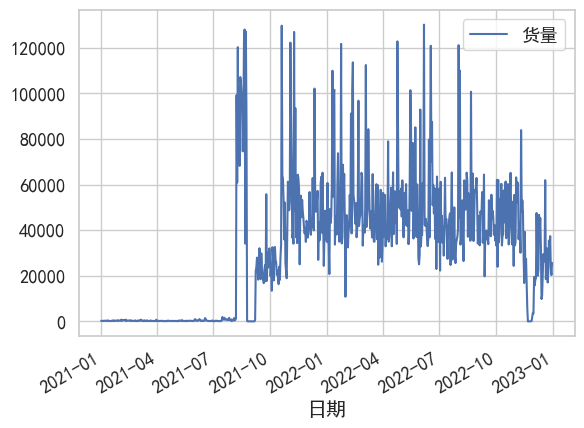

In [30]:
ddf.plot()
plt.show()

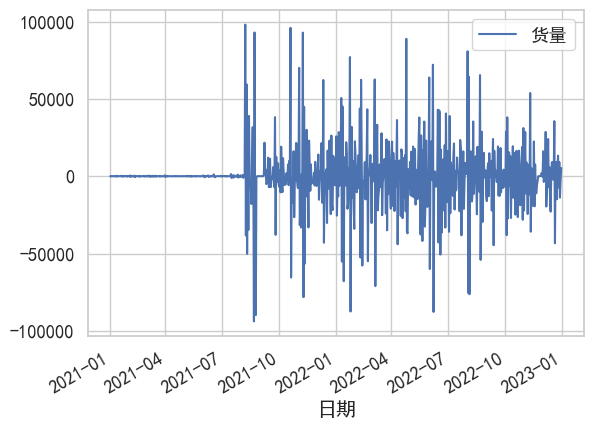

In [33]:
data_diff = ddf.diff().dropna()
data_diff.plot()
plt.show()

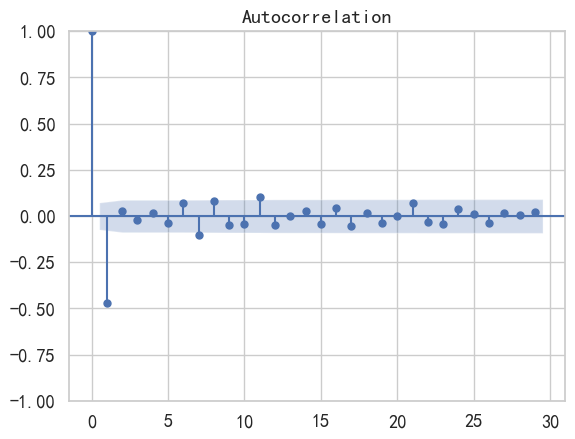

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


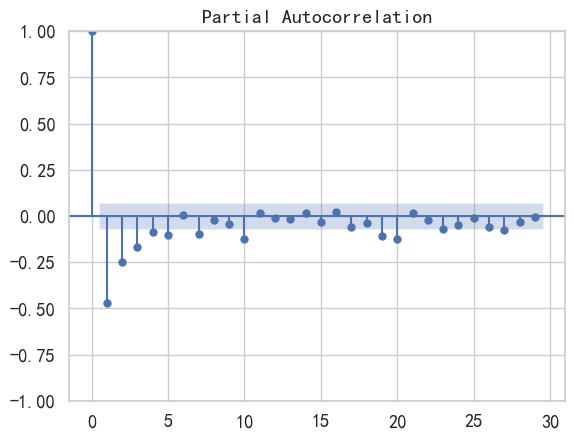

In [34]:
plot_acf(data_diff, title='ACF')
plt.show()

plot_pacf(data_diff, title='PACF')
plt.show()
